## Random Forest 

In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

In [185]:
# Load the Excel file
excel_file = 'glass.xlsx'
sheet_name = 'Sheet1'  

In [187]:
# List all sheet names
sheet_names = pd.ExcelFile('glass.xlsx').sheet_names
print("Available sheets:", sheet_names)

Available sheets: ['Description', 'glass']


In [189]:
# Read the 'glass' sheet
df = pd.read_excel(excel_file, sheet_name='glass')

In [191]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [193]:
# Save the DataFrame as a CSV file
csv_file = 'glass.csv'
df.to_csv(csv_file, index=False)

In [195]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [197]:
df.shape

(214, 10)

In [199]:
df.size

2140

In [201]:
# Get summary information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [203]:
# Get summary statistics for numeric columns
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [205]:
# Check for missing values in each column
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [207]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

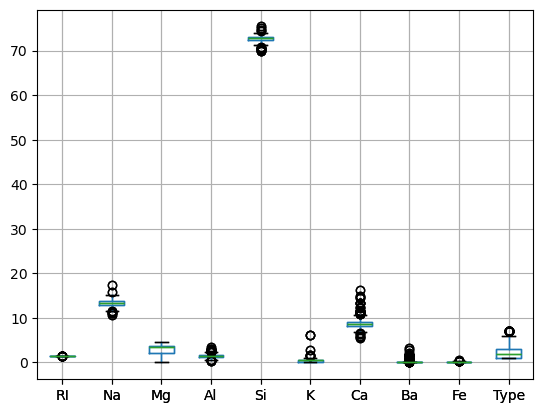

In [219]:
df.boxplot()
plt.show()

In [221]:
Q1ri=df['RI'].quantile(0.25)
Q3ri=df['RI'].quantile(0.75)
IQRri=Q3ri-Q1ri
print(Q1ri,Q3ri,IQRri)

1.5165225 1.5191575 0.002634999999999943


In [223]:
lower_extremeri=Q1ri-1.5*IQRri
upper_extremeri=Q3ri+1.5*IQRri
print(lower_extremeri,upper_extremeri)

1.5125700000000002 1.52311


In [225]:
df_ri_outliers= df[(df['RI']<lower_extremeri) | (df['RI']>upper_extremeri)]
df_ri_outliers

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
47,1.52667,13.99,3.70,0.71,71.57,0.02,9.82,0.00,0.10,1
50,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.00,0.16,1
56,1.51215,12.99,3.47,1.12,72.98,0.62,8.35,0.00,0.31,1
103,1.52725,13.80,3.15,0.66,70.57,0.08,11.64,0.00,0.00,2
104,1.52410,13.83,2.90,1.17,71.15,0.08,10.79,0.00,0.00,2
105,1.52475,11.45,0.00,1.88,72.19,0.81,13.24,0.00,0.34,2
106,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28,2
107,1.53393,12.30,0.00,1.00,70.16,0.12,16.19,0.00,0.24,2
110,1.52664,11.23,0.00,0.77,73.21,0.00,14.68,0.00,0.00,2
111,1.52739,11.02,0.00,0.75,73.08,0.00,14.96,0.00,0.00,2


In [227]:
df_ri_no_outliers= df[(df['RI']>=lower_extremeri) & (df['RI']<=upper_extremeri)]
df_ri_no_outliers

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [229]:
Q1na=df['Na'].quantile(0.25)
Q3na=df['Na'].quantile(0.75)
IQRna=Q3na-Q1na
print(Q1na,Q3na,IQRna)

12.9075 13.825 0.9174999999999986


In [231]:
lower_extremena=Q1na-1.5*IQRna
upper_extremena=Q3na+1.5*IQRna
print(lower_extremena,upper_extremena)

11.531250000000004 15.201249999999998


In [233]:
df_na_outliers= df[(df['Na']<lower_extremena) | (df['Na']>upper_extremena)]
df_na_outliers

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
105,1.52475,11.45,0.00,1.88,72.19,0.81,13.24,0.00,0.34,2
106,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28,2
110,1.52664,11.23,0.00,0.77,73.21,0.00,14.68,0.00,0.00,2
111,1.52739,11.02,0.00,0.75,73.08,0.00,14.96,0.00,0.00,2
166,1.52151,11.03,1.71,1.56,73.44,0.58,11.62,0.00,0.00,5
184,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.00,0.00,6
189,1.52365,15.79,1.83,1.31,70.43,0.31,8.61,1.68,0.00,7


In [235]:
df_na_no_outliers= df[(df['Na']>=lower_extremena) & (df['Na']<=upper_extremena)]
df_na_no_outliers

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [237]:
Q1mg=df['Mg'].quantile(0.25)
Q3mg=df['Mg'].quantile(0.75)
IQRmg=Q3mg-Q1mg
print(Q1mg,Q3mg,IQRmg)

2.1149999999999998 3.6 1.4850000000000003


In [239]:
lower_extrememg=Q1mg-1.5*IQRmg
upper_extrememg=Q3mg+1.5*IQRmg
print(lower_extrememg,upper_extrememg)

-0.11250000000000071 5.827500000000001


In [241]:
df_mg_outliers= df[(df['Mg']<lower_extrememg) | (df['Mg']>upper_extrememg)]
df_mg_outliers

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type


In [243]:
Q1al=df['Al'].quantile(0.25)
Q3al=df['Al'].quantile(0.75)
IQRal=Q3al-Q1al
print(Q1al,Q3al,IQRal)

1.19 1.63 0.43999999999999995


In [245]:
lower_extremeal=Q1al-1.5*IQRal
upper_extremeal=Q3al+1.5*IQRal
print(lower_extremeal,upper_extremeal)

0.53 2.29


In [247]:
df_al_outliers= df[(df['Al']<lower_extremeal) | (df['Al']>upper_extremeal)]
df_al_outliers

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
21,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.00,0.00,1
38,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.00,0.00,1
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.00,0.00,1
50,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.00,0.16,1
163,1.51514,14.01,2.68,3.50,69.89,1.68,5.87,2.20,0.00,5
171,1.51316,13.02,0.00,3.04,70.48,6.21,6.96,0.00,0.00,5
172,1.51321,13.00,0.00,3.02,70.70,6.21,6.93,0.00,0.00,5
184,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.00,0.00,6
191,1.51602,14.85,0.00,2.38,73.28,0.00,8.76,0.64,0.09,7
192,1.51623,14.20,0.00,2.79,73.46,0.04,9.04,0.40,0.09,7


In [249]:
df_al_no_outliers= df[(df['Al']>=lower_extremeal) & (df['Al']<=upper_extremeal)]
df_al_no_outliers

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
207,1.51831,14.39,0.00,1.82,72.86,1.41,6.47,2.88,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [251]:
Q1si=df['Si'].quantile(0.25)
Q3si=df['Si'].quantile(0.75)
IQRsi=Q3si-Q1si
print(Q1si,Q3si,IQRsi)

72.28 73.0875 0.8075000000000045


In [253]:
lower_extremesi=Q1si-1.5*IQRsi
upper_extremesi=Q3si+1.5*IQRsi
print(lower_extremesi,upper_extremesi)

71.06875 74.29875000000001


In [259]:
df_si_outliers= df[(df['Si']<lower_extremesi) | (df['Si']>upper_extremesi)]
df_si_outliers

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
103,1.52725,13.80,3.15,0.66,70.57,0.08,11.64,0.00,0.00,2
106,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28,2
107,1.53393,12.30,0.00,1.00,70.16,0.12,16.19,0.00,0.24,2
109,1.51818,13.72,0.00,0.56,74.45,0.00,10.99,0.00,0.00,2
163,1.51514,14.01,2.68,3.50,69.89,1.68,5.87,2.20,0.00,5
171,1.51316,13.02,0.00,3.04,70.48,6.21,6.96,0.00,0.00,5
172,1.51321,13.00,0.00,3.02,70.70,6.21,6.93,0.00,0.00,5
180,1.51299,14.40,1.74,1.54,74.55,0.00,7.59,0.00,0.00,6
184,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.00,0.00,6
188,1.52247,14.86,2.20,2.06,70.26,0.76,9.76,0.00,0.00,7


In [261]:
df_si_no_outliers= df[(df['Si']>=lower_extremesi) & (df['Si']<=upper_extremesi)]
df_si_no_outliers

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [263]:
Q1k=df['K'].quantile(0.25)
Q3k=df['K'].quantile(0.75)
IQRk=Q3k-Q1k
print(Q1k,Q3k,IQRk)

0.1225 0.61 0.4875


In [265]:
lower_extremek=Q1k-1.5*IQRk
upper_extremek=Q3k+1.5*IQRk
print(lower_extremek,upper_extremek)

-0.6087499999999999 1.34125


In [267]:
df_k_outliers= df[(df['K']<lower_extremek) | (df['K']>upper_extremek)]
df_k_outliers

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
163,1.51514,14.01,2.68,3.50,69.89,1.68,5.87,2.20,0.0,5
171,1.51316,13.02,0.00,3.04,70.48,6.21,6.96,0.00,0.0,5
172,1.51321,13.00,0.00,3.02,70.70,6.21,6.93,0.00,0.0,5
185,1.51131,13.69,3.20,1.81,72.81,1.76,5.43,1.19,0.0,7
186,1.51838,14.32,3.26,2.22,71.25,1.46,5.79,1.63,0.0,7
201,1.51653,11.95,0.00,1.19,75.18,2.70,8.93,0.00,0.0,7
207,1.51831,14.39,0.00,1.82,72.86,1.41,6.47,2.88,0.0,7


In [269]:
df_k_no_outliers= df[(df['K']>=lower_extremek) & (df['K']<=upper_extremek)]
df_k_no_outliers

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [271]:
Q1ca=df['Ca'].quantile(0.25)
Q3ca=df['Ca'].quantile(0.75)
IQRca=Q3ca-Q1ca
print(Q1ca,Q3ca,IQRca)

8.24 9.1725 0.9324999999999992


In [273]:
lower_extremeca=Q1ca-1.5*IQRca
upper_extremeca=Q3ca+1.5*IQRca
print(lower_extremeca,upper_extremeca)

6.841250000000001 10.57125


In [275]:
df_ca_outliers= df[(df['Ca']<lower_extremeca) | (df['Ca']>upper_extremeca)]
df_ca_outliers

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
103,1.52725,13.80,3.15,0.66,70.57,0.08,11.64,0.00,0.00,2
104,1.52410,13.83,2.90,1.17,71.15,0.08,10.79,0.00,0.00,2
105,1.52475,11.45,0.00,1.88,72.19,0.81,13.24,0.00,0.34,2
106,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28,2
107,1.53393,12.30,0.00,1.00,70.16,0.12,16.19,0.00,0.24,2
108,1.52222,14.43,0.00,1.00,72.67,0.10,11.52,0.00,0.08,2
109,1.51818,13.72,0.00,0.56,74.45,0.00,10.99,0.00,0.00,2
110,1.52664,11.23,0.00,0.77,73.21,0.00,14.68,0.00,0.00,2
111,1.52739,11.02,0.00,0.75,73.08,0.00,14.96,0.00,0.00,2
112,1.52777,12.64,0.00,0.67,72.02,0.06,14.40,0.00,0.00,2


In [277]:
df_ca_no_outliers= df[(df['Ca']>=lower_extremeca) & (df['Ca']<=upper_extremeca)]
df_ca_no_outliers

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [279]:
Q1ba=df['Ba'].quantile(0.25)
Q3ba=df['Ba'].quantile(0.75)
IQRba=Q3ba-Q1ba
print(Q1ba,Q3ba,IQRba)

0.0 0.0 0.0


In [281]:
lower_extremeba=Q1ba-1.5*IQRba
upper_extremeba=Q3ba+1.5*IQRba
print(lower_extremeba,upper_extremeba)

0.0 0.0


In [283]:
df_ba_outliers= df[(df['Ba']<lower_extremeba) | (df['Ba']>upper_extremeba)]
df_ba_outliers

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
32,1.51775,12.85,3.48,1.23,72.97,0.61,8.56,0.09,0.22,1
36,1.51909,13.89,3.53,1.32,71.81,0.51,8.78,0.11,0.00,1
61,1.51977,13.81,3.58,1.32,71.72,0.12,8.67,0.69,0.00,1
99,1.51811,12.96,2.96,1.43,72.92,0.60,8.79,0.14,0.00,2
100,1.51655,12.75,2.85,1.44,73.27,0.57,8.79,0.11,0.22,2
106,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28,2
128,1.52068,13.55,2.09,1.67,72.18,0.53,9.57,0.27,0.17,2
141,1.51851,13.20,3.63,1.07,72.83,0.57,8.41,0.09,0.17,2
142,1.51662,12.85,3.51,1.44,73.01,0.68,8.23,0.06,0.25,2
161,1.51934,13.64,3.54,0.75,72.65,0.16,8.89,0.15,0.24,3


In [285]:
df_ba_no_outliers= df[(df['Ba']>=lower_extremeba) & (df['Ba']<=upper_extremeba)]
df_ba_no_outliers

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...
183,1.51969,14.56,0.00,0.56,73.48,0.00,11.22,0.0,0.0,6
184,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.0,6
187,1.52315,13.44,3.34,1.23,72.38,0.60,8.83,0.0,0.0,7
188,1.52247,14.86,2.20,2.06,70.26,0.76,9.76,0.0,0.0,7


In [287]:
Q1fe=df['Fe'].quantile(0.25)
Q3fe=df['Fe'].quantile(0.75)
IQRfe=Q3fe-Q1fe
print(Q1fe,Q3fe,IQRfe)

0.0 0.1 0.1


In [289]:
lower_extremefe=Q1fe-1.5*IQRfe
upper_extremefe=Q3fe+1.5*IQRfe
print(lower_extremefe,upper_extremefe)

-0.15000000000000002 0.25


In [291]:
df_fe_outliers= df[(df['Fe']<lower_extremefe) | (df['Fe']>upper_extremefe)]
df_fe_outliers

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
44,1.51786,12.73,3.43,1.19,72.95,0.62,8.76,0.00,0.30,1
56,1.51215,12.99,3.47,1.12,72.98,0.62,8.35,0.00,0.31,1
71,1.51848,13.64,3.87,1.27,71.96,0.54,8.32,0.00,0.32,2
105,1.52475,11.45,0.00,1.88,72.19,0.81,13.24,0.00,0.34,2
106,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28,2
118,1.51673,13.30,3.64,1.53,72.53,0.65,8.03,0.00,0.29,2
135,1.51789,13.19,3.90,1.30,72.33,0.55,8.44,0.00,0.28,2
145,1.51839,12.85,3.67,1.24,72.57,0.62,8.68,0.00,0.35,2
162,1.52211,14.19,3.78,0.91,71.36,0.23,9.14,0.00,0.37,3


In [293]:
df_fe_no_outliers= df[(df['Fe']>=lower_extremefe) & (df['Fe']<=upper_extremefe)]
df_fe_no_outliers

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [295]:
Q1t=df['Type'].quantile(0.25)
Q3t=df['Type'].quantile(0.75)
IQRt=Q3t-Q1t
print(Q1t,Q3t,IQRt)

1.0 3.0 2.0


In [297]:
lower_extremet=Q1t-1.5*IQRt
upper_extremet=Q3t+1.5*IQRt
print(lower_extremet,upper_extremet)

-2.0 6.0


In [299]:
df_t_outliers= df[(df['Type']<lower_extremet) | (df['Type']>upper_extremet)]
df_t_outliers

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
185,1.51131,13.69,3.20,1.81,72.81,1.76,5.43,1.19,0.00,7
186,1.51838,14.32,3.26,2.22,71.25,1.46,5.79,1.63,0.00,7
187,1.52315,13.44,3.34,1.23,72.38,0.60,8.83,0.00,0.00,7
188,1.52247,14.86,2.20,2.06,70.26,0.76,9.76,0.00,0.00,7
189,1.52365,15.79,1.83,1.31,70.43,0.31,8.61,1.68,0.00,7
190,1.51613,13.88,1.78,1.79,73.10,0.00,8.67,0.76,0.00,7
191,1.51602,14.85,0.00,2.38,73.28,0.00,8.76,0.64,0.09,7
192,1.51623,14.20,0.00,2.79,73.46,0.04,9.04,0.40,0.09,7
193,1.51719,14.75,0.00,2.00,73.02,0.00,8.53,1.59,0.08,7
194,1.51683,14.56,0.00,1.98,73.29,0.00,8.52,1.57,0.07,7


In [301]:
df_t_no_outliers= df[(df['Type']>=lower_extremet) & (df['Type']<=upper_extremet)]
df_t_no_outliers

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...
180,1.51299,14.40,1.74,1.54,74.55,0.00,7.59,0.0,0.0,6
181,1.51888,14.99,0.78,1.74,72.50,0.00,9.95,0.0,0.0,6
182,1.51916,14.15,0.00,2.09,72.74,0.00,10.88,0.0,0.0,6
183,1.51969,14.56,0.00,0.56,73.48,0.00,11.22,0.0,0.0,6


In [303]:
target=df[['Type']]
target

,Type
0,1
1,1
2,1
3,1
4,1
...,...
209,7
210,7
211,7
212,7


In [305]:
features=df.drop(columns='Type')
features

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [307]:
cat_col = [i for i in features.columns if features[i].dtype=='O']
cat_col

[]

In [309]:
num_col = [i for i in features.columns if features[i].dtype!='O']
num_col

['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

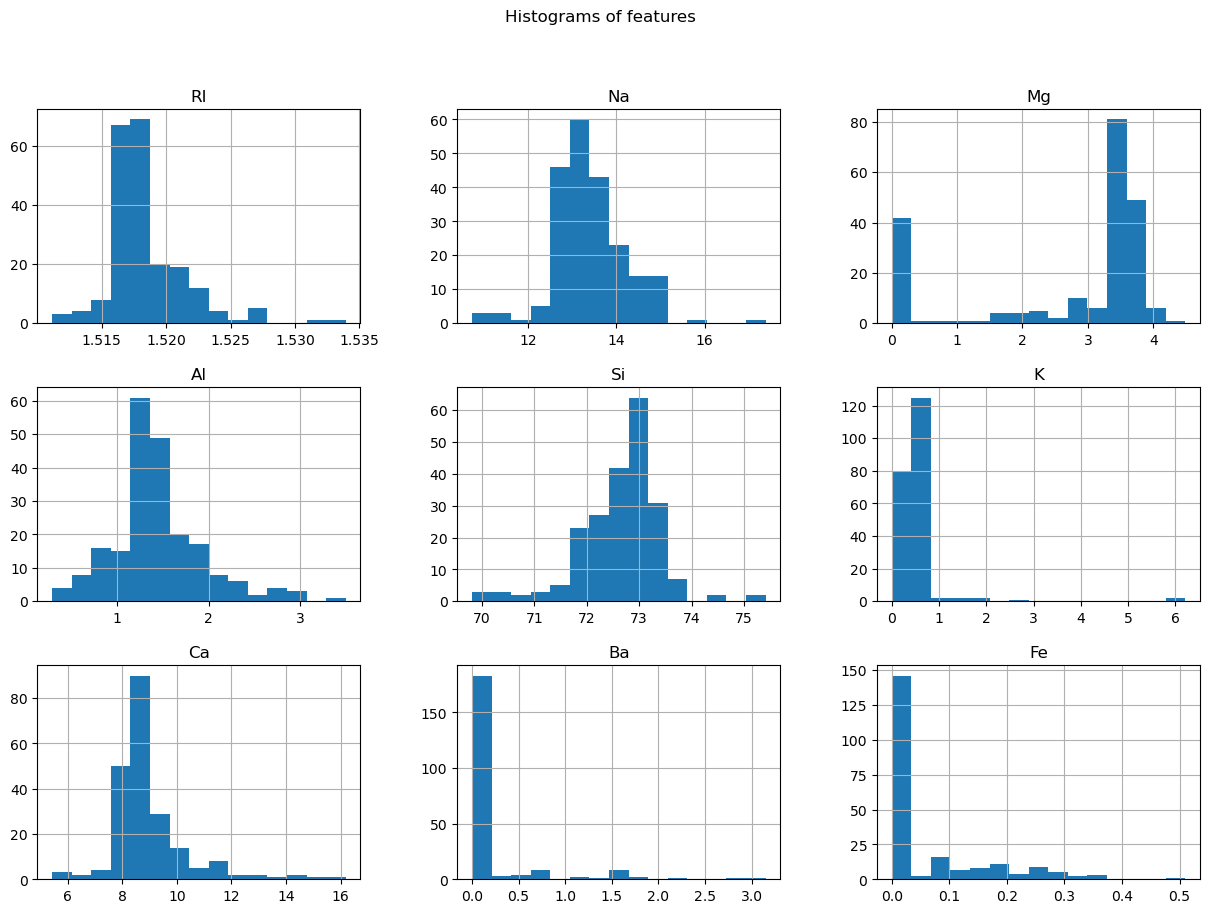

In [311]:
# Plot histograms
features.hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.suptitle("Histograms of features")
plt.show()

In [313]:
target.value_counts()

Type
2       76
1       70
7       29
3       17
5       13
6        9
dtype: int64

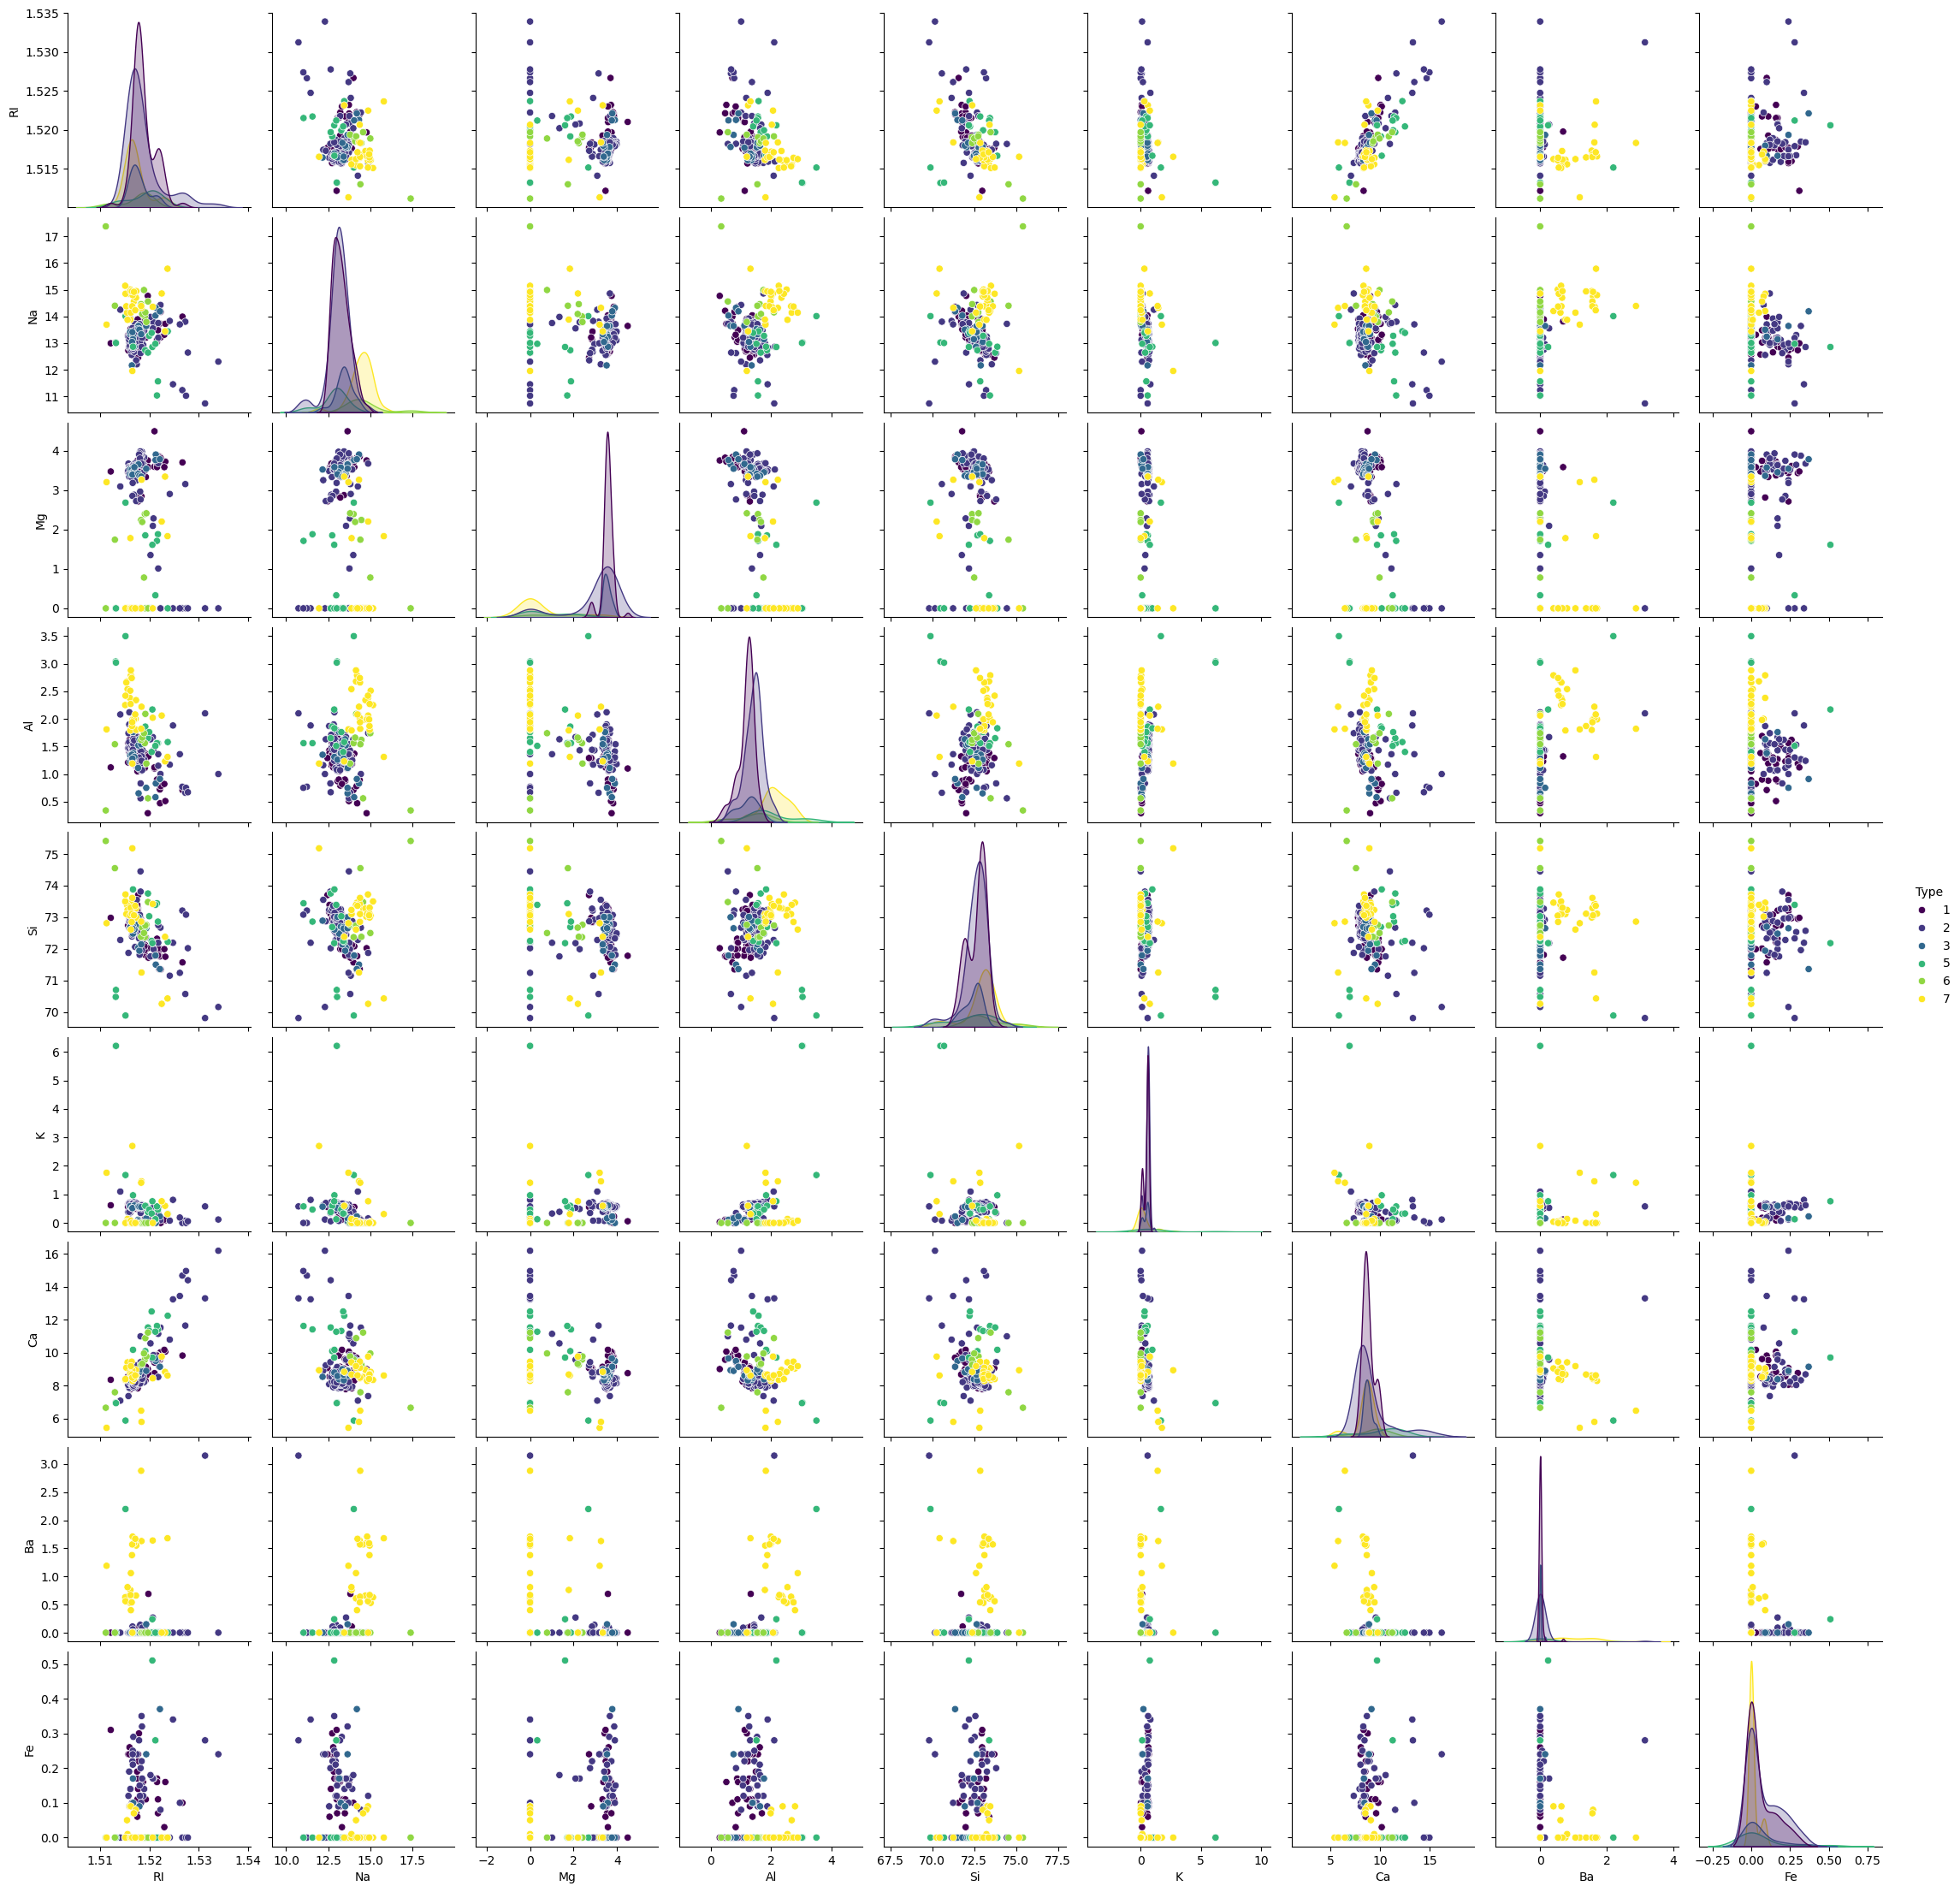

In [315]:
# Use sns.pairplot to create pair plots for selected features
sns.pairplot(df, vars=['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'], 
             hue='Type', palette='viridis', diag_kind='kde')
plt.show()

In [317]:
# Compute the correlation matrix
correlation_matrix = df.corr()

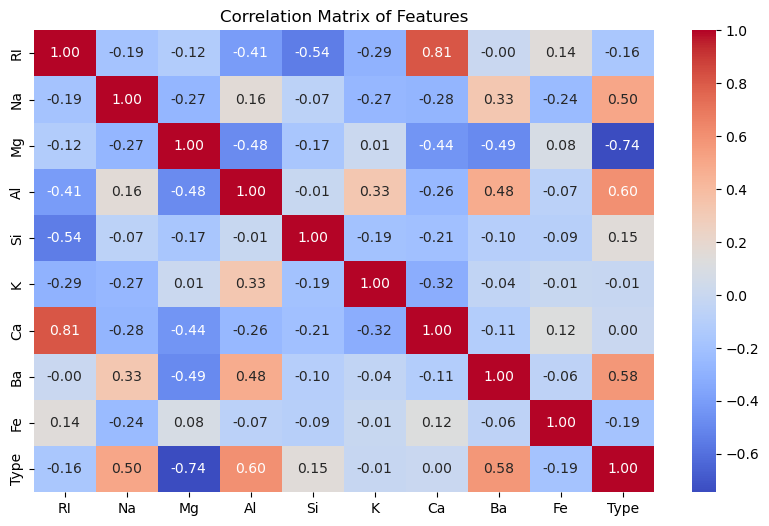

In [319]:
# Plot the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Features")
plt.show()

In [321]:
from sklearn.preprocessing import StandardScaler

In [323]:
stand_sca = StandardScaler()

In [325]:
df2=pd.DataFrame(stand_sca.fit_transform(features),columns=features.columns)

In [327]:
df2

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451
...,...,...,...,...,...,...,...,...,...
209,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.640968,0.157088,1.783978,-0.586451
210,-0.500178,1.856097,-1.865511,1.094342,0.529374,-0.763919,-0.392276,2.852405,-0.586451
211,0.754046,1.168721,-1.865511,1.154570,0.995252,-0.763919,-0.364103,2.953200,-0.586451
212,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,-0.335931,2.812087,-0.586451


In [329]:
#  Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [331]:
x_train

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
79,1.51590,12.82,3.52,1.90,72.86,0.69,7.97,0.00,0.00
161,1.51934,13.64,3.54,0.75,72.65,0.16,8.89,0.15,0.24
109,1.51818,13.72,0.00,0.56,74.45,0.00,10.99,0.00,0.00
127,1.52081,13.78,2.28,1.43,71.99,0.49,9.85,0.00,0.17
95,1.51860,13.36,3.43,1.43,72.26,0.51,8.60,0.00,0.00
...,...,...,...,...,...,...,...,...,...
106,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28
14,1.51763,12.61,3.59,1.31,73.29,0.58,8.50,0.00,0.00
92,1.51588,13.12,3.41,1.58,73.26,0.07,8.39,0.00,0.19
179,1.51852,14.09,2.19,1.66,72.67,0.00,9.32,0.00,0.00


In [333]:
x_test

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.00,0.11
197,1.51727,14.70,0.00,2.34,73.28,0.00,8.95,0.66,0.00
66,1.52152,13.05,3.65,0.87,72.22,0.19,9.85,0.00,0.17
191,1.51602,14.85,0.00,2.38,73.28,0.00,8.76,0.64,0.09
117,1.51708,13.72,3.68,1.81,72.06,0.64,7.88,0.00,0.00
111,1.52739,11.02,0.00,0.75,73.08,0.00,14.96,0.00,0.00
15,1.51761,12.81,3.54,1.23,73.24,0.58,8.39,0.00,0.00
86,1.51569,13.24,3.49,1.47,73.25,0.38,8.03,0.00,0.00
75,1.51590,13.02,3.58,1.51,73.12,0.69,7.96,0.00,0.00
144,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.00,0.24


In [335]:
y_train

,Type
79,2
161,3
109,2
127,2
95,2
...,...
106,2
14,1
92,2
179,6


In [337]:
y_test

,Type
9,1
197,7
66,1
191,7
117,2
111,2
15,1
86,2
75,2
144,2


In [341]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

In [345]:
import warnings
warnings.filterwarnings('ignore')

In [347]:
# Train the model on the training data
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [349]:
# Make predictions on the test data
y_pred = rf_model.predict(x_test)

In [351]:
y_pred

array([1, 7, 1, 7, 2, 2, 1, 2, 2, 1, 6, 2, 1, 2, 6, 5, 7, 1, 1, 6, 2, 7,
       7, 7, 3, 2, 1, 1, 5, 1, 1, 2, 3, 2, 1, 7, 5, 1, 1, 7, 1, 7, 1],
      dtype=int64)

In [377]:
# Evaluate the model's performance
accuracy1 = accuracy_score(y_test, y_pred)
precision1 = precision_score(y_test, y_pred, average='weighted')
recall1 = recall_score(y_test, y_pred, average='weighted')
f1_1= f1_score(y_test, y_pred, average='weighted')

In [379]:
# Print the evaluation metrics
print("Random Forest Model Performance:")
print(f"Accuracy: {accuracy1:.2f}")
print(f"Precision: {precision1:.2f}")
print(f"Recall: {recall1:.2f}")
print(f"F1 Score: {f1_1:.2f}")

Random Forest Model Performance:
Accuracy: 0.84
Precision: 0.87
Recall: 0.84
F1 Score: 0.83


In [381]:
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier

In [383]:
# Initialize and train the Bagging model
bagging_model = BaggingClassifier(random_state=42)

In [363]:
bagging_model.fit(x_train, y_train)

BaggingClassifier(random_state=42)

In [365]:
y_pred_bagging = bagging_model.predict(x_test)

In [367]:
y_pred_bagging

array([1, 7, 1, 7, 2, 2, 1, 2, 2, 2, 6, 5, 1, 2, 6, 5, 7, 1, 1, 6, 2, 7,
       7, 7, 3, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 7, 5, 1, 1, 1, 2, 7, 3],
      dtype=int64)

In [369]:
# Initialize and train the Boosting model
boosting_model = GradientBoostingClassifier(random_state=42)

In [371]:
boosting_model.fit(x_train, y_train)

GradientBoostingClassifier(random_state=42)

In [373]:
y_pred_boosting = boosting_model.predict(x_test)

In [375]:
y_pred_boosting

array([1, 7, 1, 7, 2, 2, 1, 2, 2, 1, 6, 2, 2, 2, 3, 5, 7, 1, 1, 7, 2, 7,
       7, 7, 3, 2, 1, 1, 5, 1, 1, 2, 3, 2, 1, 7, 5, 3, 1, 2, 1, 7, 1],
      dtype=int64)

In [385]:
# Evaluate the bagging method's performance
accuracy2 = accuracy_score(y_test, y_pred_bagging)
precision2 = precision_score(y_test, y_pred_bagging, average='weighted')
recall2 = recall_score(y_test, y_pred_bagging, average='weighted')
f1_2= f1_score(y_test, y_pred_bagging, average='weighted')

In [391]:
# Print the evaluation metrics of bagging
print("bagging Method Performance:")
print(f"Accuracy: {accuracy2:.2f}")
print(f"Precision: {precision2:.2f}")
print(f"Recall: {recall2:.2f}")
print(f"F1 Score: {f1_2:.2f}")

bagging Method Performance:
Accuracy: 0.84
Precision: 0.84
Recall: 0.84
F1 Score: 0.83


In [393]:
# Evaluate the boosting method's performance
accuracy3 = accuracy_score(y_test, y_pred_boosting)
precision3 = precision_score(y_test, y_pred_boosting, average='weighted')
recall3 = recall_score(y_test, y_pred_boosting, average='weighted')
f1_3= f1_score(y_test, y_pred_boosting, average='weighted')

In [395]:
# Print the evaluation metrics of boosting
print("boosting Method Performance:")
print(f"Accuracy: {accuracy3:.2f}")
print(f"Precision: {precision3:.2f}")
print(f"Recall: {recall3:.2f}")
print(f"F1 Score: {f1_3:.2f}")

boosting Method Performance:
Accuracy: 0.86
Precision: 0.88
Recall: 0.86
F1 Score: 0.85


In [397]:
# from the analysis boosting is more accurate, precise, have high recall value and F1 score. 

In [ ]:
#Additional Notes:

In [ ]:
# 1. Explain Bagging and Boosting methods. How is it different from each other?

In [ ]:
# Bagging and Boosting are both ensemble learning techniques that combine multiple base models to improve the overall performance of a predictive model.
# However, they do so in fundamentally different ways, aiming to address different types of model issues.

In [ ]:
# 1. Bagging (Bootstrap Aggregating)
# Bagging (Bootstrap Aggregating) is an ensemble technique that builds multiple versions of a model by training each one on a randomly sampled subset of the original training data (with replacement, allowing for some data points to appear multiple times in each sample).
# Works:Multiple subsets of data are created by random sampling with replacement (bootstrapping).
# Each model is trained independently on its own bootstrapped subset.
# The final prediction is made by averaging the predictions of all models (for regression) or majority voting (for classification).
# Bagging is primarily used to reduce variance in high-variance models (e.g., decision trees). It does this by averaging over many diverse models, which tends to cancel out individual model errors.
# Key Example: Random Forest is a popular Bagging-based algorithm where each base model is a decision tree.

In [ ]:
# 2. Boosting
# Boosting is an ensemble technique that trains models sequentially, where each new model attempts to correct the errors made by the previous model. Unlike Bagging, Boosting does not use random sampling with replacement.
# Works:The first model is trained on the full training data.
# Each subsequent model is trained by focusing more on the data points that previous models misclassified or predicted poorly.
# This is typically done by adjusting weights on the misclassified data points, so the new model pays more attention to them.
# Final predictions are usually made by weighted averaging or a cumulative score.
# Boosting aims to reduce both bias and variance by iteratively improving upon errors from previous models. Boosting models often achieve higher accuracy but can be more prone to overfitting, especially with noisy data.
# Key Examples: AdaBoost, Gradient Boosting, and XGBoost.

In [ ]:
# 2. Explain how to handle imbalance in the data.

In [ ]:
# Handling imbalanced data is a common challenge in machine learning, particularly in classification problems where one class significantly outnumbers the others.
# Here are some effective techniques to address this issue,

In [ ]:
# 1. Resampling Techniques
# Oversampling the Minority Class:
# Increases the number of instances in the minority class by randomly duplicating examples or using synthetic data.
# SMOTE (Synthetic Minority Over-sampling Technique): Generates synthetic examples for the minority class by interpolating between neighboring minority instances.
# ADASYN (Adaptive Synthetic Sampling): Similar to SMOTE but generates more synthetic data points for minority samples that are harder to classify.
# Undersampling the Majority Class:
# Reduces the number of instances in the majority class by randomly removing samples, balancing the dataset at the cost of potentially losing valuable information.
# Cluster-based Undersampling: Clusters majority class data points and keeps only representative samples to reduce data loss.

In [ ]:
# 2. Using Different Evaluation Metrics
# For imbalanced datasets, accuracy can be misleading as the model may correctly predict the majority class while ignoring the minority class. Instead, use metrics that provide a better assessment of model performance for each class:
# Precision: Measures the proportion of true positives among the positive predictions. Useful when false positives are costly.
# Recall (Sensitivity): Measures the proportion of true positives that were correctly identified by the model, highlighting how well the minority class is identified.
# F1 Score: The harmonic mean of precision and recall, useful when there is a trade-off between them.
# ROC-AUC: Evaluates the model's ability to distinguish between classes, useful for imbalanced classes.
# Precision-Recall Curve: Provides insight into precision and recall trade-offs, often more informative than ROC-AUC with high class imbalance.

In [ ]:
# 3. Class Weights Adjustment
# Some machine learning algorithms allow adjusting the weight for each class, making the model penalize misclassification of the minority class more heavily.
#In Scikit-Learn: Many models (e.g., RandomForestClassifier, LogisticRegression, SVM) have a class_weight parameter, which can be set to balanced to automatically adjust weights inversely proportional to class frequencies.

In [ ]:
# 4. Ensemble Techniques
# Certain ensemble techniques, such as Random Forest and Gradient Boosting, are more robust to class imbalance. For these algorithms, adjusting class weights or using sampling techniques often improves performance.
# Balanced Random Forest: Combines random undersampling of the majority class with the Random Forest algorithm.
# EasyEnsemble and BalanceCascade: Advanced techniques that use ensemble methods with undersampling, creating multiple balanced subsets for training.

In [ ]:
# 5. Anomaly Detection Models
# For extreme cases of imbalance, where the minority class is exceedingly rare, you can treat the minority class as an anomaly or outlier. 
#Models like Isolation Forest, One-Class SVM, and Autoencoders are useful for detecting rare events.